# NSL Notebook 06

In [1]:
from default import *

## Exercise 06.1

The purpose for this exercise is to simulate using **MC** method the trend of thermodynamic variables:

* $U(N,T)$, internal energy
* $C(N,T)$, heat capacity
* $X(N,T)$, susceptibility
* $M(N,T,h)$, magnetization

when an **Ising 1D model** composed by N-spin (up or down) is cooled.

The parameters for the simulation are:

* $N=50$, with period boundary conditions, so $N+1=1$
* $[0.5,\,2]$, temperature range
* $J=1$, coupling costant between spins inside Ising hamiltonian
* $h=0.02$, external field inside Ising hamiltonian

The idea behind the simulation is to use **Metropolis algo** to flip a random spin, where the transition probability is the Boltzmann probability of the energy gap between the initial configuration (random spin not flip) and the final configuration (random spin flip). 

Theoretically computing a number of sufficient steps, the 1D system should converge to the equilibrium configuration at the given temperature, and so thermodynamic variables can be computed.

So, as we already knew, is so important the equilibration part, I divided the temperature range in $10$ parts, and at every temperature, starting from a initial random configuration of spins, I equilibrate the system using $5*10^4$ steps (half of those used for simulation) and then compute the simulation with $10^5$ steps. The simulation part consist (as usual), at every metropolis step, in computing the thermodynamic vars and averaging each of them using blocking method.

Another method used, as a sort of double check, beside metropolis is the **Gibbs method**, very similar to metropolis, but that can produce different results. The idea is to flip the random spin with a transition probability that is indipendent from the chosen spin, and that permit to accept always the move, so a spin is always flipped.

Below the comparison between the results, using two evolution method (**Metropolis** and **Gibbs**), for each thermodynamic variables,  with the **theoretical trends** of the 1D Ising model (that is analytically solvable) taken from here:

In [2]:
from theory import *

Clarification: considering that the transition probability change if $h\neq0$, the first run was made using $h=0$, (default behaviour) and the second run was made setting the $h=0.02$ uncommenting line 31 inside `main.cpp`:

```cpp
/****
*  after first run, uncomment method below
*  and re-run to calculate the same thermodynamic variables with h!=0
****/
// isi.setFieldh(0.02);

```

Then only $M(N,T,h)$ results, and so the files `M-M-h.csv` and `G-M-h.csv` have been preserved and plotted.

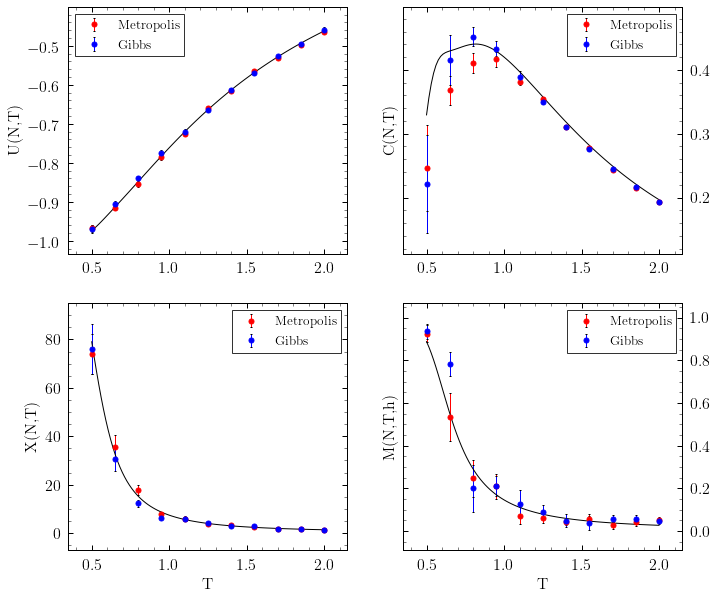

In [5]:
# appo vars
th = "UCXM"
mt = "MG"
dth = dict()
dte = {'U': U, 'C': C, 'M': M, 'X': X}

# load output file
for m in mt:
    dth[m] = dict()
    for var in th:
        if var == 'M':
            dth[m][var] = pd.read_csv(f"{m}-{var}-h-blk.csv", 
                                      header=None, 
                                      names=['T',var,'E'])
        else:
            dth[m][var] = pd.read_csv(f"{m}-{var}-blk.csv", 
                                      header=None, 
                                      names=['T',var,'E'])


fig, axes = plt.subplots(2, 2, figsize=(11,10));

# reshape subplots
axes = np.asarray(axes)
axes.shape = (1,4)
axes = axes[0]

# plot variables
for ax, var, i in zip(axes, dth['M'], range(len(th))):
    ax.plot(T, dte[var], '-k')
    if var != 'M':
        ax.set_ylabel(f"{var}(N,T)")
    else:
        ax.set_ylabel(f"{var}(N,T,h)")
    ax.set_xlabel("T") if (i == 2 or i == 3) else 0
    if (i == 1 or i == 3):
        ax.yaxis.tick_right()
        ax.yaxis.set_ticks_position('both')
    else:
        None
    for m in mt:
        cc = 'red' if m == 'M' else 'blue'
        ll = 'Metropolis' if m == 'M' else 'Gibbs'
        ax.errorbar(dth[m][var]['T'], 
                    dth[m][var][var], 
                    yerr=dth[m][var]['E'], 
                    marker='o', 
                    ms=5, 
                    ls='', 
                    capsize=1.3, 
                    ecolor=cc, 
                    mfc=cc, 
                    mec=cc, 
                    label=ll);
    ax.legend(fontsize='small');